![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://mona.software/wp-content/uploads/2021/07/data-analyst-la-gi.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Statistics reaction

 ![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Install library


In [3]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
post_df_full = pd.read_csv("C:/FinalProject/DoraemonVN.csv")
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        127 non-null    int64  
 1   text                           125 non-null    object 
 2   post_text                      125 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           127 non-null    object 
 6   timestamp                      127 non-null    int64  
 7   image                          123 non-null    object 
 8   image_lowquality               127 non-null    object 
 9   images                         126 non-null    object 
 10  images_description             126 non-null    object 
 11  images_lowquality              127 non-null    object 
 12  images_lowquality_description  127 non-null    obj

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Data preprocessing


### Remove unnecessary data

In [15]:
for col in post_df_full.columns :
    miss_data = post_df_full[col].isna().sum()
    miss_per = miss_data / len(post_df_full)
    miss_per = round(miss_per * 100,2)
    print(f"{col} có : {miss_per}% dữ liệu bị mất")

post_id có : 0.0% dữ liệu bị mất
text có : 1.57% dữ liệu bị mất
post_text có : 1.57% dữ liệu bị mất
shared_text có : 100.0% dữ liệu bị mất
original_text có : 100.0% dữ liệu bị mất
time có : 0.0% dữ liệu bị mất
timestamp có : 0.0% dữ liệu bị mất
image có : 3.15% dữ liệu bị mất
image_lowquality có : 0.0% dữ liệu bị mất
images có : 0.79% dữ liệu bị mất
images_description có : 0.79% dữ liệu bị mất
images_lowquality có : 0.0% dữ liệu bị mất
images_lowquality_description có : 0.0% dữ liệu bị mất
video có : 99.21% dữ liệu bị mất
video_duration_seconds có : 100.0% dữ liệu bị mất
video_height có : 100.0% dữ liệu bị mất
video_id có : 99.21% dữ liệu bị mất
video_quality có : 100.0% dữ liệu bị mất
video_size_MB có : 100.0% dữ liệu bị mất
video_thumbnail có : 99.21% dữ liệu bị mất
video_watches có : 100.0% dữ liệu bị mất
video_width có : 100.0% dữ liệu bị mất
likes có : 100.0% dữ liệu bị mất
comments có : 0.0% dữ liệu bị mất
shares có : 0.0% dữ liệu bị mất
post_url có : 0.0% dữ liệu bị mất
link có 

<Axes: >

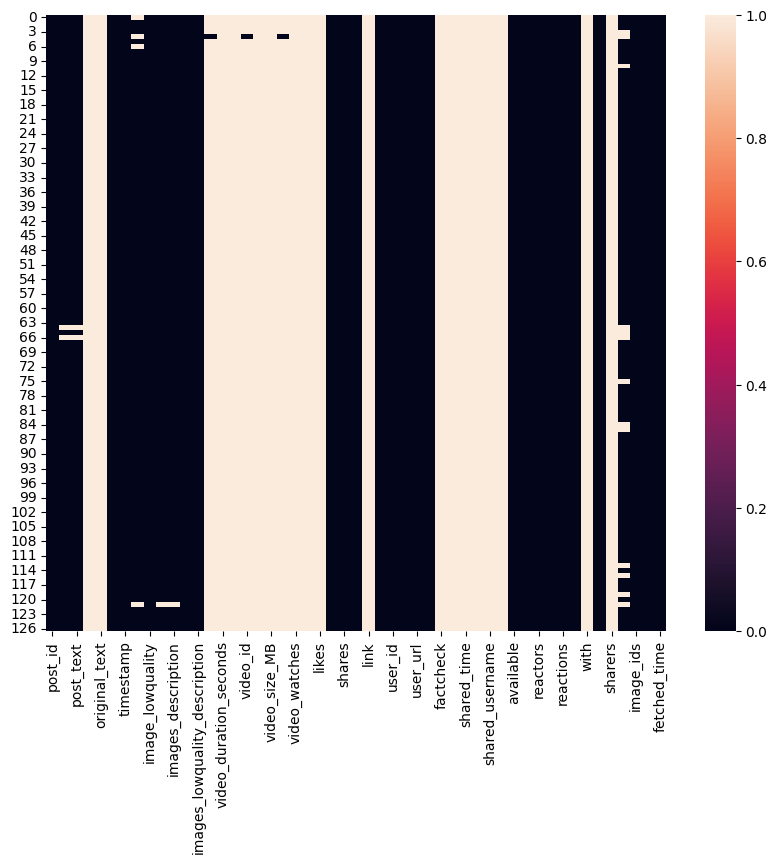

In [16]:
fig , ax = plt.subplots(figsize = (10,8))
sns.heatmap(post_df_full.isna())

In [17]:
for col in post_df_full.columns:
    miss_data = post_df_full[col].isna().sum()
    miss_per = miss_data / len(post_df_full)
    miss_per = round(miss_per * 100, 2)
    
    if miss_per > 90:
        post_df_full.drop(col, axis=1, inplace=True)
        print(f"{col} đã bị xóa vì có {miss_per}% dữ liệu bị mất.")


shared_text đã bị xóa vì có 100.0% dữ liệu bị mất.
original_text đã bị xóa vì có 100.0% dữ liệu bị mất.
video đã bị xóa vì có 99.21% dữ liệu bị mất.
video_duration_seconds đã bị xóa vì có 100.0% dữ liệu bị mất.
video_height đã bị xóa vì có 100.0% dữ liệu bị mất.
video_id đã bị xóa vì có 99.21% dữ liệu bị mất.
video_quality đã bị xóa vì có 100.0% dữ liệu bị mất.
video_size_MB đã bị xóa vì có 100.0% dữ liệu bị mất.
video_thumbnail đã bị xóa vì có 99.21% dữ liệu bị mất.
video_watches đã bị xóa vì có 100.0% dữ liệu bị mất.
video_width đã bị xóa vì có 100.0% dữ liệu bị mất.
likes đã bị xóa vì có 100.0% dữ liệu bị mất.
link đã bị xóa vì có 100.0% dữ liệu bị mất.
factcheck đã bị xóa vì có 100.0% dữ liệu bị mất.
shared_post_id đã bị xóa vì có 100.0% dữ liệu bị mất.
shared_time đã bị xóa vì có 100.0% dữ liệu bị mất.
shared_user_id đã bị xóa vì có 100.0% dữ liệu bị mất.
shared_username đã bị xóa vì có 100.0% dữ liệu bị mất.
shared_post_url đã bị xóa vì có 100.0% dữ liệu bị mất.
with đã bị xóa vì

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Statistics and Visualization


In [18]:
post_df_full

,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,comments_full,reactors,w3_fb_url,reactions,reaction_count,page_id,image_id,image_ids,was_live,fetched_time
0,731920548974517,Một phút thật lòng nào :),Một phút thật lòng nào :),2023-11-08 18:46:30,1699443990,NaN,https://scontent.fhan20-1.fna.fbcdn.net/v/t39....,[],[],['https://scontent.fhan20-1.fna.fbcdn.net/v/t3...,...,"[{'comment_id': '2307538126108949', 'comment_u...",[],https://www.facebook.com/DoraemonVietnam/posts...,"{'thích': 563, 'yêu thích': 364, 'haha': 72, '...",1029,201387753325011,7.319205e+14,['731920535641185'],False,2023-11-08 21:35:41.836942
1,731844392315466,Movie Doraemon mới: Nobita và cuộc phiêu lưu đ...,Movie Doraemon mới: Nobita và cuộc phiêu lưu đ...,2023-11-08 15:05:21,1699430721,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan20-1.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,['Có thể là tác phẩm nghệ thuật đại chúng về v...,['https://scontent.fhan20-1.fna.fbcdn.net/v/t3...,...,"[{'comment_id': '713348383989611', 'comment_ur...","[{'name': 'Lê Tấn Thành', 'link': 'https://fac...",https://www.facebook.com/DoraemonVietnam/posts...,"{'thích': 71, 'haha': 90, 'wow': 1, 'buồn': 1}",163,201387753325011,7.318444e+14,['731844378982134'],False,2023-11-08 21:35:47.480625
2,731186132381292,Mối tình đầu của ông Nobi.\nNgười chưa biết sẽ...,Mối tình đầu của ông Nobi.\nNgười chưa biết sẽ...,2023-11-07 15:10:53,1699344653,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan20-1.fna.fbcdn.net/v/t39....,['https://m.facebook.com/photo/view_full_size/...,"[""Có thể là hình ảnh về văn bản cho biết 'Cô G...",['https://scontent.fhan20-1.fna.fbcdn.net/v/t3...,...,"[{'comment_id': '998948598068798', 'comment_ur...","[{'name': 'Vũ Thuỳ Lâm', 'link': 'https://face...",https://www.facebook.com/DoraemonVietnam/posts...,"{'thích': 400, 'yêu thích': 11, 'haha': 673, '...",1095,201387753325011,7.311861e+14,['731186112381294'],False,2023-11-08 21:35:53.672127
3,731090909057481,"Ngày 11/12/1992, nghĩa là 31 năm trước, bốn tậ...","Ngày 11/12/1992, nghĩa là 31 năm trước, bốn tậ...",2023-11-07 10:32:58,1699327978,https://scontent.fhan20-1.fna.fbcdn.net/v/t39....,https://scontent.fhan20-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan20-1.fna.fbcdn.net/v/t3...,"['Có thể là hình minh họa', 'Có thể là hình ản...",['https://scontent.fhan20-1.fna.fbcdn.net/v/t3...,...,"[{'comment_id': '3514083175496602', 'comment_u...","[{'name': 'Hang DY', 'link': 'https://facebook...",https://www.facebook.com/DoraemonVietnam/posts...,"{'thích': 203, 'yêu thích': 69, 'wow': 1, 'thư...",277,201387753325011,NaN,[],False,2023-11-08 21:36:37.345501
4,725532749613297,Chú mèo đến từ tương lai 🐧\n#Doraemon #doraemo...,Chú mèo đến từ tương lai 🐧\n#Doraemon #doraemo...,2023-10-28 18:51:07,1698493867,NaN,https://scontent.fhan20-1.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan20-1.fna.fbcdn.net/v/t1...,...,"[{'comment_id': '637556271916727', 'comment_ur...","[{'name': 'Trần Duy Hào', 'link': 'https://fac...",https://www.facebook.com/DoraemonVietnam/posts...,"{'thích': 546, 'yêu thích': 10, 'haha': 724, '...",1289,201387753325011,NaN,[],False,2023-11-08 21:36:47.683580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2455989184531512,Lại tội nghiệp quá cơ\nCre: Chuyện nhà S,Lại tội nghiệp quá cơ\nCre: Chuyện nhà S,2021-11-06 21:04:14,1636207454,https://scontent.fhan20-1.fna.fbcdn.net/v/t39....,https://scontent.fhan20-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan20-1.fna.fbcdn.net/v/t3...,['Không có mô tả ảnh.'],['https://scontent.fhan20-1.fna.fbcdn.net/v/t3...,...,"[{'comment_id': '2456003504530080', 'comment_u...",[],https://www.facebook.com/DoraemonVietnam/posts...,"{'thích': 319, 'yêu thích': 6, 'haha': 407, 't...",745,201387753325011,2.455989e+15,['2455988857864878'],False,2023-11-08 22:11:22.685790
123,2452635751533522,Xinhhhh,Xinhh

In [12]:
post_df_full["comments_full"]

0      [{'comment_id': '2307538126108949', 'comment_u...
1      [{'comment_id': '713348383989611', 'comment_ur...
2      [{'comment_id': '998948598068798', 'comment_ur...
3      [{'comment_id': '3514083175496602', 'comment_u...
4      [{'comment_id': '637556271916727', 'comment_ur...
                             ...                        
122    [{'comment_id': '2456003504530080', 'comment_u...
123    [{'comment_id': '2454744707989293', 'comment_u...
124    [{'comment_id': '2448959941901103', 'comment_u...
125    [{'comment_id': '2439251762871921', 'comment_u...
126    [{'comment_id': '2439887092808388', 'comment_u...
Name: comments_full, Length: 127, dtype: object

### Mean number of interactions

In [47]:
post_df_full.groupby(post_df_full["time"].dt.year)[['reaction_count','shares','comments']].sum()

,reaction_count,shares,comments
time,,,
2021,109963,1583,2681
2022,509663,6174,21061
2023,220114,2351,5805


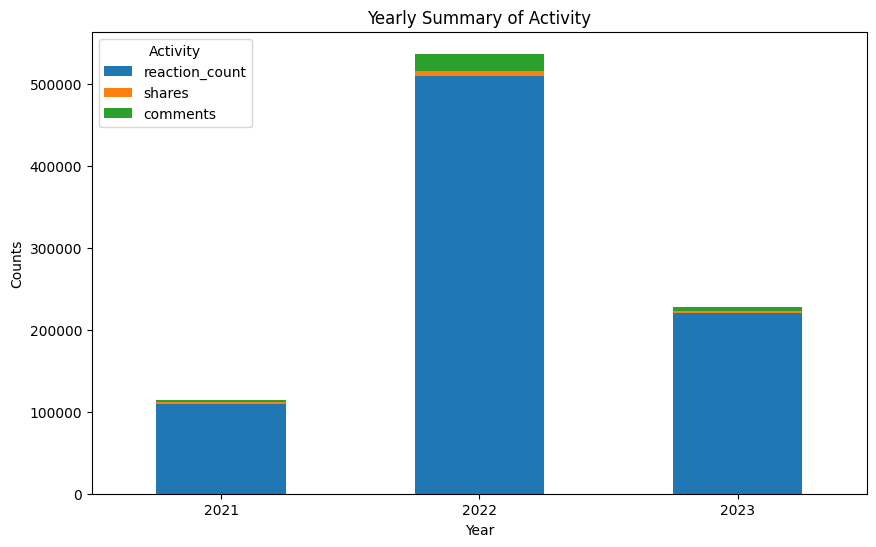

In [48]:
yearly_summary = post_df_full.groupby(post_df_full["time"].dt.year)[['reaction_count', 'shares', 'comments']].sum()

# Plot the data as a stacked bar chart
yearly_summary.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Yearly Summary of Activity')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Add a legend
plt.legend(title='Activity', loc='upper left')

plt.show()

In [49]:
start_date = post_df_full["time"].min().strftime('%Y-%m-%d')
end_date = post_df_full["time"].max().strftime('%Y-%m-%d')

print(f"Mốc thời gian thu thập từ {start_date} đến {end_date}")

Mốc thời gian thu thập từ 2021-10-15 đến 2023-11-08


In [50]:
print("Tổng reaction :",post_df_full["reaction_count"].sum())


Tổng reaction : 839740


In [51]:
average_reaction = round(post_df_full["reaction_count"].mean(), 2)
print("Số reaction trung bình:", average_reaction)

Số reaction trung bình: 6612.13


In [52]:
print("Tổng shares :",post_df_full["shares"].sum())

Tổng shares : 10108


In [53]:
average_shares = round(post_df_full["shares"].mean(), 2)
print("Số shares trung bình:", average_shares)

Số shares trung bình: 79.59


In [54]:
print("Tổng số Comments :",post_df_full["comments"].sum())

Tổng số Comments : 29547


In [55]:
average_cmt = round(post_df_full["comments"].mean(), 2)
print("Số comments trung bình:", average_cmt)

Số comments trung bình: 232.65


### Daily reactions

In [7]:

post_df_full1=post_df_full
post_df_full1[['post_id','time', 'reactions','reaction_count']]

,post_id,time,reactions,reaction_count
0,731920548974517,2023-11-08 18:46:30,"{'thích': 563, 'yêu thích': 364, 'haha': 72, '...",1029
1,731844392315466,2023-11-08 15:05:21,"{'thích': 71, 'haha': 90, 'wow': 1, 'buồn': 1}",163
2,731186132381292,2023-11-07 15:10:53,"{'thích': 400, 'yêu thích': 11, 'haha': 673, '...",1095
3,731090909057481,2023-11-07 10:32:58,"{'thích': 203, 'yêu thích': 69, 'wow': 1, 'thư...",277
4,725532749613297,2023-10-28 18:51:07,"{'thích': 546, 'yêu thích': 10, 'haha': 724, '...",1289
...,...,...,...,...
122,2455989184531512,2021-11-06 21:04:14,"{'thích': 319, 'yêu thích': 6, 'haha': 407, 't...",745
123,2452635751533522,2021-11-02 20:47:51,"{'thích': 2460, 'yêu thích': 1125, 'haha': 31,...",3686
124,2448957895234641,2021-10-29 10:57:41,"{'thích': 1100, 'yêu thích': 25, 'haha': 1204,...",2376
125,2439249156205515,2021-10-17 17:10:41,"{'thích': 352, 'yêu thích': 15, 'haha': 201, '...",579


In [5]:
post_df_full['time'] = pd.to_datetime(post_df_full['time'])

In [58]:
y_rea = post_df_full.groupby(post_df_full["time"].dt.year)['reaction_count'].sum()
y_rea

time
2021    109963
2022    509663
2023    220114
Name: reaction_count, dtype: int64

In [59]:
sizes = y_rea.values 
labels = y_rea.index

Text(0, 0.5, 'Reaction_count')

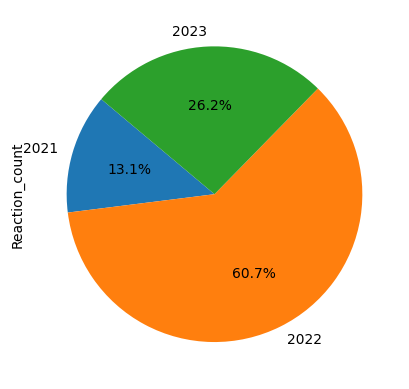

In [60]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.ylabel("Reaction_count")

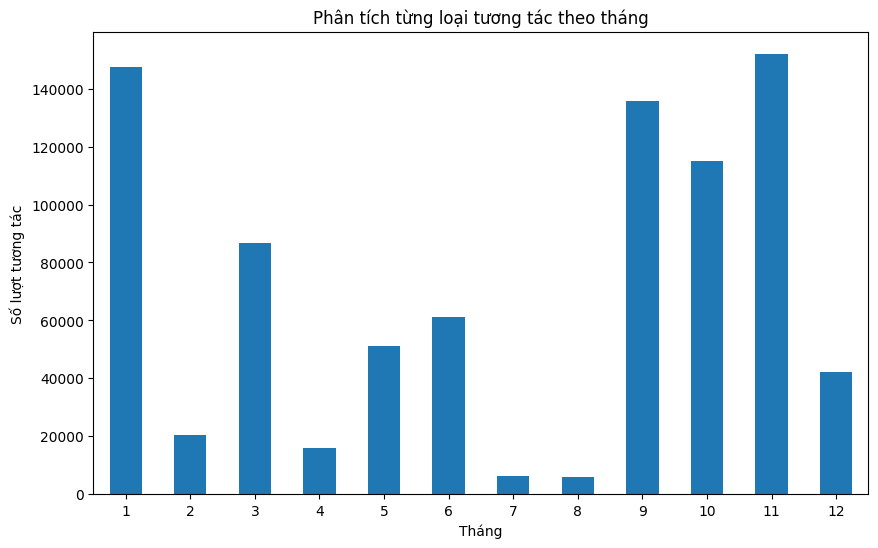

In [8]:
t_sha = post_df_full.groupby(post_df_full["time"].dt.month)['reaction_count'].sum()
t_sha.plot(kind = "bar",figsize = (10,6))
plt.title('Phân tích từng loại tương tác theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượt tương tác')
plt.xticks(rotation=0)  
plt.show()

### Categorize each emotion


In [8]:
# chuyển kiểu
post_df_full1['reactions'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )

C:\Users\FPT\AppData\Local\Temp\ipykernel_14564\1935438685.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  post_df_full_reactions = post_df_full1['reactions'].apply(pd.Series )


In [9]:
post_df_full_with_reactions = pd.concat([post_df_full1, post_df_full_reactions], axis=1).drop('reactions', axis=1)

for i in range(0, len(post_df_full_with_reactions['thích'].values), 1):
    if pd.isna(post_df_full_with_reactions['thích'].values[i]):
        post_df_full_with_reactions['thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['yêu thích'].values[i]):
        post_df_full_with_reactions['yêu thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['buồn'].values[i]):
        post_df_full_with_reactions['buồn'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['phẫn nộ'].values[i]):
        post_df_full_with_reactions['phẫn nộ'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['thương thương'].values[i]):
        post_df_full_with_reactions['thương thương'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0
    
    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]


,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,Một phút thật lòng nào :),563.0,364.0,72.0,1.0,0.0,0.0,29.0,5,132,1029
1,Movie Doraemon mới: Nobita và cuộc phiêu lưu đ...,71.0,0.0,90.0,1.0,1.0,0.0,0.0,0,5,163
2,Mối tình đầu của ông Nobi.\nNgười chưa biết sẽ...,400.0,11.0,673.0,1.0,6.0,0.0,4.0,8,49,1095
3,"Ngày 11/12/1992, nghĩa là 31 năm trước, bốn tậ...",203.0,69.0,0.0,1.0,0.0,0.0,4.0,14,10,277
4,Chú mèo đến từ tương lai 🐧\n#Doraemon #doraemo...,546.0,10.0,724.0,1.0,6.0,0.0,2.0,10,78,1289
...,...,...,...,...,...,...,...,...,...,...,...
122,Lại tội nghiệp quá cơ\nCre: Chuyện nhà S,319.0,6.0,407.0,0.0,10.0,0.0,3.0,6,12,745
123,Xinhhhh,2460.0,1125.0,31.0,16.0,6.0,1.0,47.0,350,112,3686
124,Nghe nói là chơi thân với nhau sẽ trở nên giốn...,1100.0,25.0,1204.0,3.0,35.0,1.0,8.0,27,122,2376
125,Ở nhà nghỉ dịch cứ như thế này\nBảo sao trọng ...,352.0,15.0,201.0,1.0,6.0,1.0,3.0,8,10,579


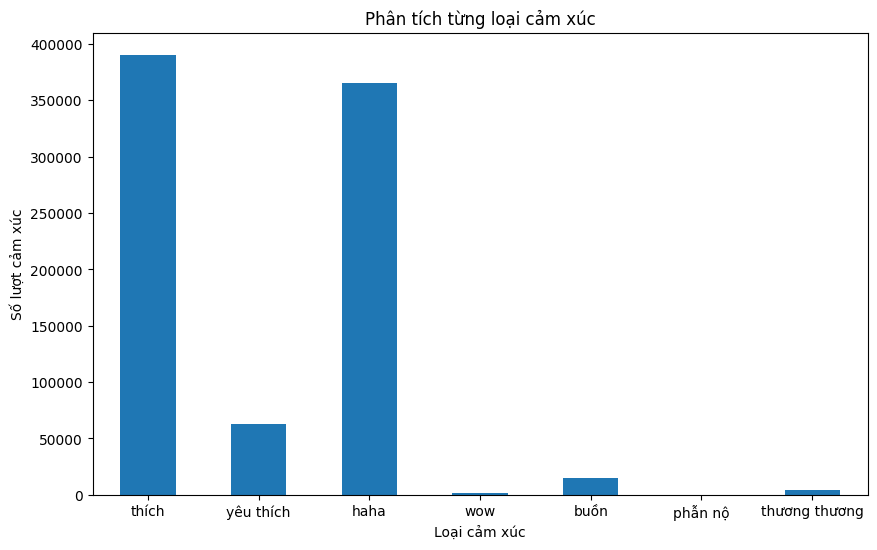

In [10]:
emotions_data = post_df_full_with_reactions[['thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']]

emotions_data.sum().plot(kind='bar', figsize=(10, 6))
plt.title('Phân tích từng loại cảm xúc')
plt.xlabel('Loại cảm xúc')
plt.ylabel('Số lượt cảm xúc')
plt.xticks(rotation=0)  
plt.show()

In [19]:
x  = round(post_df_full_with_reactions["haha"].sum() / post_df_full["reaction_count"].sum(),4) * 100
print("Số lượt tương tác Haha chiếm : " + str(x) + "%, chứng tỏ nội dung bài viết thường mang chủ đề vui vẻ!")

Số lượt tương tác Haha chiếm : 43.54%, chứng tỏ nội dung bài viết thường mang chủ đề vui vẻ!


C:\Users\FPT\AppData\Local\Temp\ipykernel_25104\1972635846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotions_data['time'] = pd.to_datetime(emotions_data['time'])


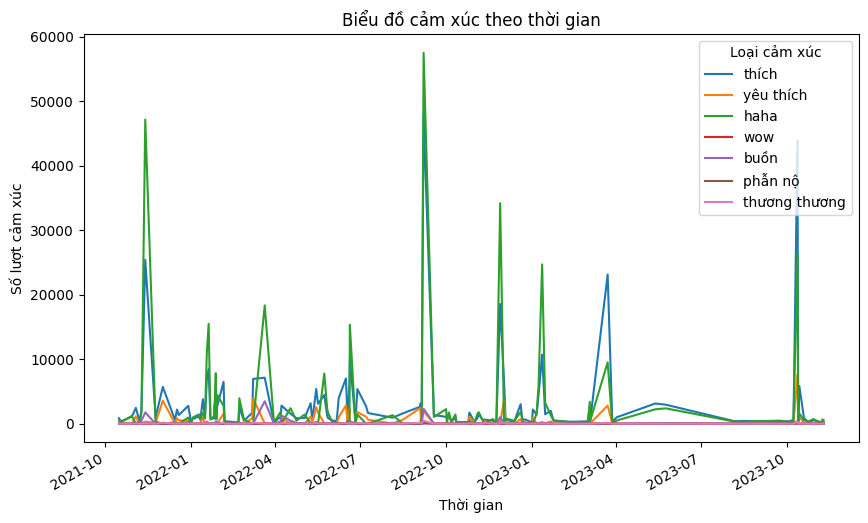

In [ ]:
emotions_data = post_df_full_with_reactions[['time', 'thích', 'yêu thích', 'haha', 'wow', 'buồn', 'phẫn nộ', 'thương thương']]

emotions_data['time'] = pd.to_datetime(emotions_data['time'])

emotions_data.set_index('time', inplace=True)

emotions_data.plot(figsize=(10, 6))
plt.title('Biểu đồ cảm xúc theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt cảm xúc')
plt.legend(title='Loại cảm xúc')

plt.show()

### Posts with the max,min interactions

In [ ]:
print("Số lượt tương tác nhiều nhất :",post_df_full["reaction_count"].max())

Số lượt tương tác nhiều nhất : 110201


In [ ]:


# Find the row with the maximum reaction_count
max_reaction_row = post_df_full.loc[post_df_full["reaction_count"].idxmax()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_max = max_reaction_row["reactions"]

# Convert the dictionary to a formatted string with line breaks
formatted_reactions = "\n".join([f"{reaction_type}: {count}" for reaction_type, count in reaction_max.items()])

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Reactions: \n{formatted_reactions}")

Post Id: 2708273079303120
Post Text: Ghét của nào trời trao của đấy
Time: 2022-09-06 18:30:30
Reactions: 
thích: 47715
yêu thích: 1910
haha: 57475
wow: 300
thương thương: 453
buồn: 2314
phẫn nộ: 34


In [ ]:
print("Số lượt tương tác ít nhất :",post_df_full["reaction_count"].min())

Số lượt tương tác ít nhất : 163


In [ ]:

max_reaction_row = post_df_full.loc[post_df_full["reaction_count"].idxmin()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_max = max_reaction_row["reactions"]

formatted_reactions = "\n".join([f"{reaction_type}: {count}" for reaction_type, count in reaction_max.items()])

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Reactions:\n{formatted_reactions}")

Post Id: 731844392315466
Post Text: Movie Doraemon mới: Nobita và cuộc phiêu lưu đến hành tinh Bắc Đẩu 😌
Time: 2023-11-08 15:05:21
Reactions:
thích: 71
haha: 90
wow: 1
buồn: 1


##### Number of posts with likes greater than 10k

In [62]:
post_df_full[post_df_full["reaction_count"] >= 10000][["post_id", "post_text", "time", "reactions", "reaction_count", "shares", "comments"]]


,post_id,post_text,time,reactions,reaction_count,shares,comments
11,714647757368463,Có hẳn phòng riêng cho chuột cơ :)),2023-10-11 20:59:04,"{'thích': 43873, 'yêu thích': 7651, 'haha': 26...",78608,921,2013
22,595757249257515,Cách để làm tan đi cái nóng lúc này,2023-03-22 17:23:32,"{'thích': 23114, 'yêu thích': 2813, 'haha': 95...",35734,359,878
30,2828329883964105,Sự thật mất lòng :)),2023-01-11 14:52:32,"{'thích': 10712, 'yêu thích': 205, 'haha': 246...",35920,351,822
31,2824884297641997,Độc lạ Tokyo :))\n\nẢnh: Khôi Dương,2023-01-07 18:21:46,"{'thích': 4428, 'yêu thích': 35, 'haha': 5860,...",10428,43,122
41,2789942831136144,89 năm ngày sinh cố họa sĩ Fujiko F. Fujio\n01...,2022-12-01 20:05:23,"{'thích': 6631, 'yêu thích': 3578, 'haha': 10,...",10461,78,51
42,2786271731503254,Nuôi ăn miễn phí rồi để nó tìm mẹ trong thùng ...,2022-11-27 17:04:17,"{'thích': 18544, 'yêu thích': 228, 'haha': 341...",54065,333,1510
61,2708273079303120,Ghét của nào trời trao của đấy,2022-09-06 18:30:30,"{'thích': 47715, 'yêu thích': 1910, 'haha': 57...",110201,922,8135
72,2643960622401033,Đây mới là chồn này🙄,2022-06-19 19:51:33,"{'thích': 10099, 'yêu thích': 234, 'haha': 153...",26196,181,959
75,2640432139420548,Happy Birthday Chaien 15/06\n\nMặc dù khá cục ...,2022-06-15 15:47:58,"{'thích': 7014, 'yêu thích': 2853, 'haha': 81,...",10085,52,397
81,2620535051410257,Bớt đua đòi đi :)),2022-05-23 11:50:53,"{'thích': 4450, 'yêu thích': 46, 'haha': 7777,...",12351,141,165


### Posts with the max,min shares

In [63]:
y_sha = post_df_full.groupby(post_df_full["time"].dt.year)['shares'].sum()
y_sha

time
2021    1583
2022    6174
2023    2351
Name: shares, dtype: int64

Text(0, 0.5, 'Shares')

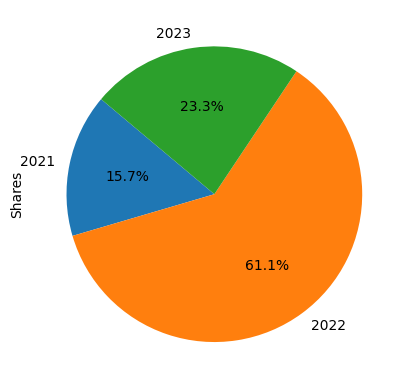

In [64]:
sizes = y_sha.values
labels = y_sha.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.ylabel("Shares")

In [65]:

max_reaction_row = post_df_full.loc[post_df_full["shares"].idxmax()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_shares = max_reaction_row["shares"]

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Shares: {reaction_shares}")

Post Id: 2708273079303120
Post Text: Ghét của nào trời trao của đấy
Time: 2022-09-06 18:30:30
Shares: 922


In [66]:

max_reaction_row = post_df_full.loc[post_df_full["shares"].idxmin()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_shares = max_reaction_row["shares"]

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Shares: {reaction_shares}")

Post Id: 731844392315466
Post Text: Movie Doraemon mới: Nobita và cuộc phiêu lưu đến hành tinh Bắc Đẩu 😌
Time: 2023-11-08 15:05:21
Shares: 0


##### Number of articles with shares greater than 500

In [67]:
post_df_full[post_df_full["shares"] >= 500][["post_id", "post_text", "time", "reactions", "reaction_count", "shares", "comments"]]

,post_id,post_text,time,reactions,reaction_count,shares,comments
11,714647757368463,Có hẳn phòng riêng cho chuột cơ :)),2023-10-11 20:59:04,"{'thích': 43873, 'yêu thích': 7651, 'haha': 26...",78608,921,2013
61,2708273079303120,Ghét của nào trời trao của đấy,2022-09-06 18:30:30,"{'thích': 47715, 'yêu thích': 1910, 'haha': 57...",110201,922,8135
65,2705211556275939,"🎉03.09.2022🎉\n\nCHÚC MỪNG SINH NHẬT DORAEMON, ...",2022-09-03 05:44:43,"{'thích': 2644, 'yêu thích': 2426, 'haha': 20,...",5218,509,539


### Post with tha max,min comments

In [6]:
y_com = post_df_full.groupby(post_df_full["time"].dt.year)['comments'].sum()
y_com

time
2021     2681
2022    21061
2023     5805
Name: comments, dtype: int64

Text(0, 0.5, 'Comments')

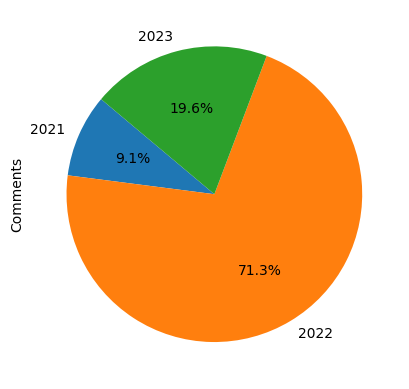

In [7]:
sizes = y_com.values
labels = y_com.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.ylabel("Comments")

In [70]:

max_reaction_row = post_df_full.loc[post_df_full["comments"].idxmax()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_comments = max_reaction_row["comments"]

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Comments: {reaction_comments}")

Post Id: 2708273079303120
Post Text: Ghét của nào trời trao của đấy
Time: 2022-09-06 18:30:30
Comments: 8135


In [71]:

max_reaction_row = post_df_full.loc[post_df_full["comments"].idxmin()]

max_reaction_id = max_reaction_row["post_id"]
max_reaction_text = max_reaction_row["post_text"]
max_reaction_time = max_reaction_row["time"]
reaction_comments = max_reaction_row["comments"]

print(f"Post Id: {max_reaction_id}")
print(f"Post Text: {max_reaction_text}")
print(f"Time: {max_reaction_time}")
print(f"Comments: {reaction_comments}")

Post Id: 2575499035913859
Post Text: Xuka kiểu: Keep My Name Out Your F***king Head
Time: 2022-03-30 15:41:39
Comments: 1


##### Number of articles with comments greater than 1000

In [72]:
post_df_full[post_df_full["comments"] >= 1000][["post_id", "post_text", "time", "reactions", "reaction_count", "shares", "comments"]]

,post_id,post_text,time,reactions,reaction_count,shares,comments
11,714647757368463,Có hẳn phòng riêng cho chuột cơ :)),2023-10-11 20:59:04,"{'thích': 43873, 'yêu thích': 7651, 'haha': 26...",78608,921,2013
38,2807155129414914,Độc là Vũng Tàu :)))\n\nẢnh: Giang Hoàng Đan,2022-12-19 15:05:34,"{'thích': 3035, 'yêu thích': 721, 'haha': 1820...",5699,128,1153
42,2786271731503254,Nuôi ăn miễn phí rồi để nó tìm mẹ trong thùng ...,2022-11-27 17:04:17,"{'thích': 18544, 'yêu thích': 228, 'haha': 341...",54065,333,1510
61,2708273079303120,Ghét của nào trời trao của đấy,2022-09-06 18:30:30,"{'thích': 47715, 'yêu thích': 1910, 'haha': 57...",110201,922,8135
120,2461153630681734,Là ma nhưng xem phim ma vẫn sợ :)),2021-11-12 21:48:30,"{'thích': 25391, 'yêu thích': 332, 'haha': 471...",74801,437,1307


### Regular posting timestamps

In [73]:
post_df_full['post_hour'] = post_df_full['time'].dt.hour
x_h = post_df_full.groupby('post_hour').size()
x_h

post_hour
4      1
5      1
6      1
7      2
8      1
9      1
10     8
11     2
12     3
13    10
14     6
15    14
16    10
17     9
18    11
19    18
20    16
21    11
22     2
dtype: int64

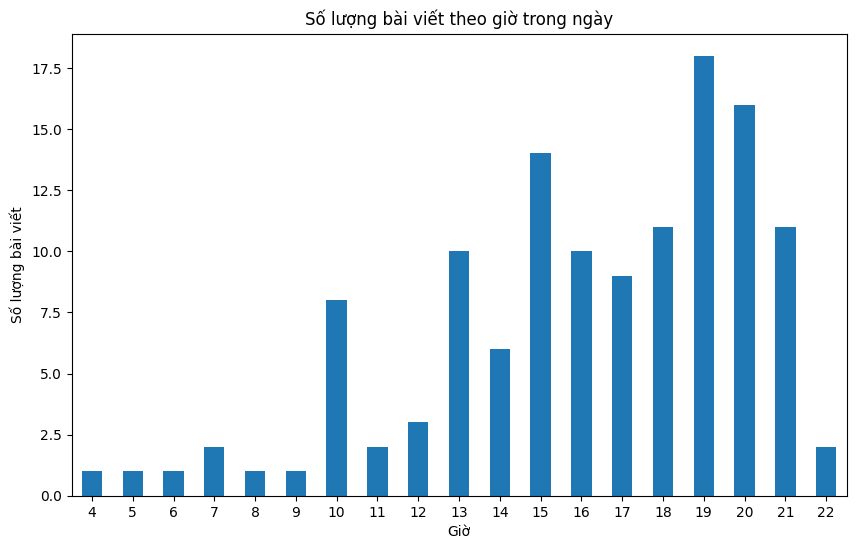

In [74]:
plt.figure(figsize=(10, 6))
x_h.plot(kind='bar')
plt.title('Số lượng bài viết theo giờ trong ngày')
plt.xlabel('Giờ')
plt.ylabel('Số lượng bài viết')
plt.xticks(rotation=0) 

plt.show()

##### Time frame with the most abd fewest posts

In [75]:
max_hour = x_h.idxmax()
max_post_count = x_h.max()

print(f"Thời gian có nhiều bài post nhất vào khoảng:{max_hour} giờ,số lượng: {max_post_count} bài post")


Thời gian có nhiều bài post nhất vào khoảng:19 giờ,số lượng: 18 bài post


In [76]:
min_hour = x_h.idxmin()
min_post_count = x_h.min()

print(f"Thời gian có ít bài post nhất vào khoảng: {min_hour} giờ,số lượng: {min_post_count} bài post")


Thời gian có ít bài post nhất vào khoảng: 4 giờ,số lượng: 1 bài post


### Average number of interactions per hour

In [77]:
x_r = post_df_full.groupby("post_hour")["reaction_count"].sum()
x_r

post_hour
4       3884
5       5218
6       2324
7       7091
8      11083
9      11540
10     15281
11     13386
12     10226
13     24957
14     43863
15     42002
16     22783
17    153426
18    158549
19     68401
20    132373
21    110132
22      3221
Name: reaction_count, dtype: int64

In [78]:
#How many interactions does a post get on average?
x_a = x_r // x_h
x_a

post_hour
4      3884
5      5218
6      2324
7      3545
8     11083
9     11540
10     1910
11     6693
12     3408
13     2495
14     7310
15     3000
16     2278
17    17047
18    14413
19     3800
20     8273
21    10012
22     1610
dtype: int64

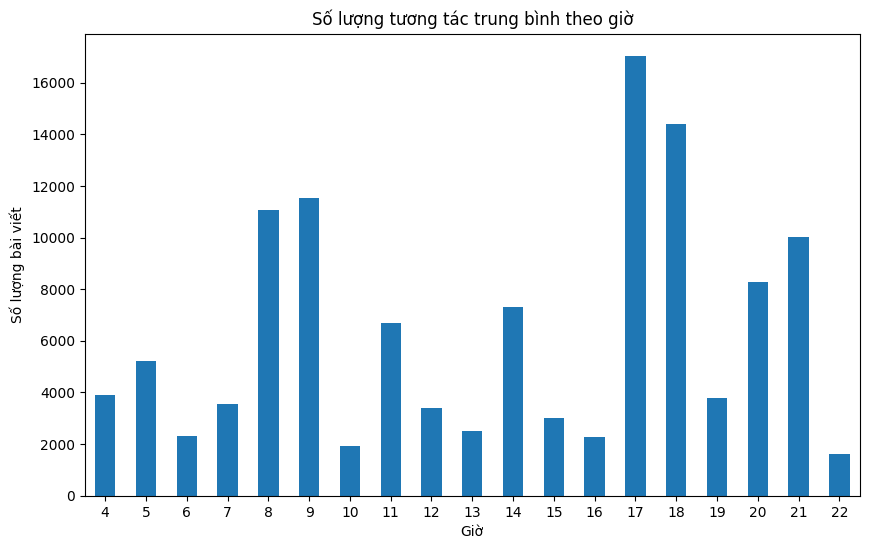

In [79]:

plt.figure(figsize=(10, 6))
x_a.plot(kind='bar')
plt.title('Số lượng tương tác trung bình theo giờ')
plt.xlabel('Giờ')
plt.ylabel('Số lượng bài viết')
plt.xticks(rotation=0) 

plt.show()

In [80]:
max_hour = x_a.idxmax()
max_post_count = x_a.max()

print(f"Lượt tương tác trung bình của bài viết cao nhất vào lúc:{max_hour} giờ,số lượng: {max_post_count} tương tác trên 1 bài post")

Lượt tương tác trung bình của bài viết cao nhất vào lúc:17 giờ,số lượng: 17047 tương tác trên 1 bài post


In [81]:
max_hour = x_a.idxmin()
max_post_count = x_a.min()

print(f"Lượt tương tác trung bình của bài viết thấp nhất vào lúc:{max_hour} giờ,số lượng: {max_post_count} tương tác trên 1 bài post")

Lượt tương tác trung bình của bài viết thấp nhất vào lúc:22 giờ,số lượng: 1610 tương tác trên 1 bài post


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Analyze keywords in the article

### Number of articles containing the keyword "Doraemon"

In [82]:
a = post_df_full_with_reactions['post_text'].tolist()
print("Tổng số bài viết:", len(a))

res = []
for i in a:
    if isinstance(i, str) and "Doraemon" in i:
        res.append(i)

print(len(res), "bài viết chứa từ khóa 'Doraemon'")


Tổng số bài viết: 127
18 bài viết chứa từ khóa 'Doraemon'


### Number of articles containing the keyword "Nobita"

In [83]:
a = post_df_full_with_reactions['post_text'].tolist()
print("Tổng số bài viết:", len(a))

res = []
for i in a:
    if isinstance(i, str) and "Nobita" in i:
        res.append(i)

print(len(res), "bài viết chứa từ khóa 'Nobita'")

Tổng số bài viết: 127
10 bài viết chứa từ khóa 'Nobita'


### Wordcloud 

In [84]:
df_text = post_df_full[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,731920548974517,Một phút thật lòng nào :)
1,731844392315466,Movie Doraemon mới: Nobita và cuộc phiêu lưu đ...
2,731186132381292,Mối tình đầu của ông Nobi.\nNgười chưa biết sẽ...
3,731090909057481,"Ngày 11/12/1992, nghĩa là 31 năm trước, bốn tậ..."
4,725532749613297,Chú mèo đến từ tương lai 🐧\n#Doraemon #doraemo...
...,...,...
122,2455989184531512,Lại tội nghiệp quá cơ\nCre: Chuyện nhà S
123,2452635751533522,Xinhhhh
124,2448957895234641,Nghe nói là chơi thân với nhau sẽ trở nên giốn...
125,2439249156205515,Ở nhà nghỉ dịch cứ như thế này\nBảo sao trọng ...


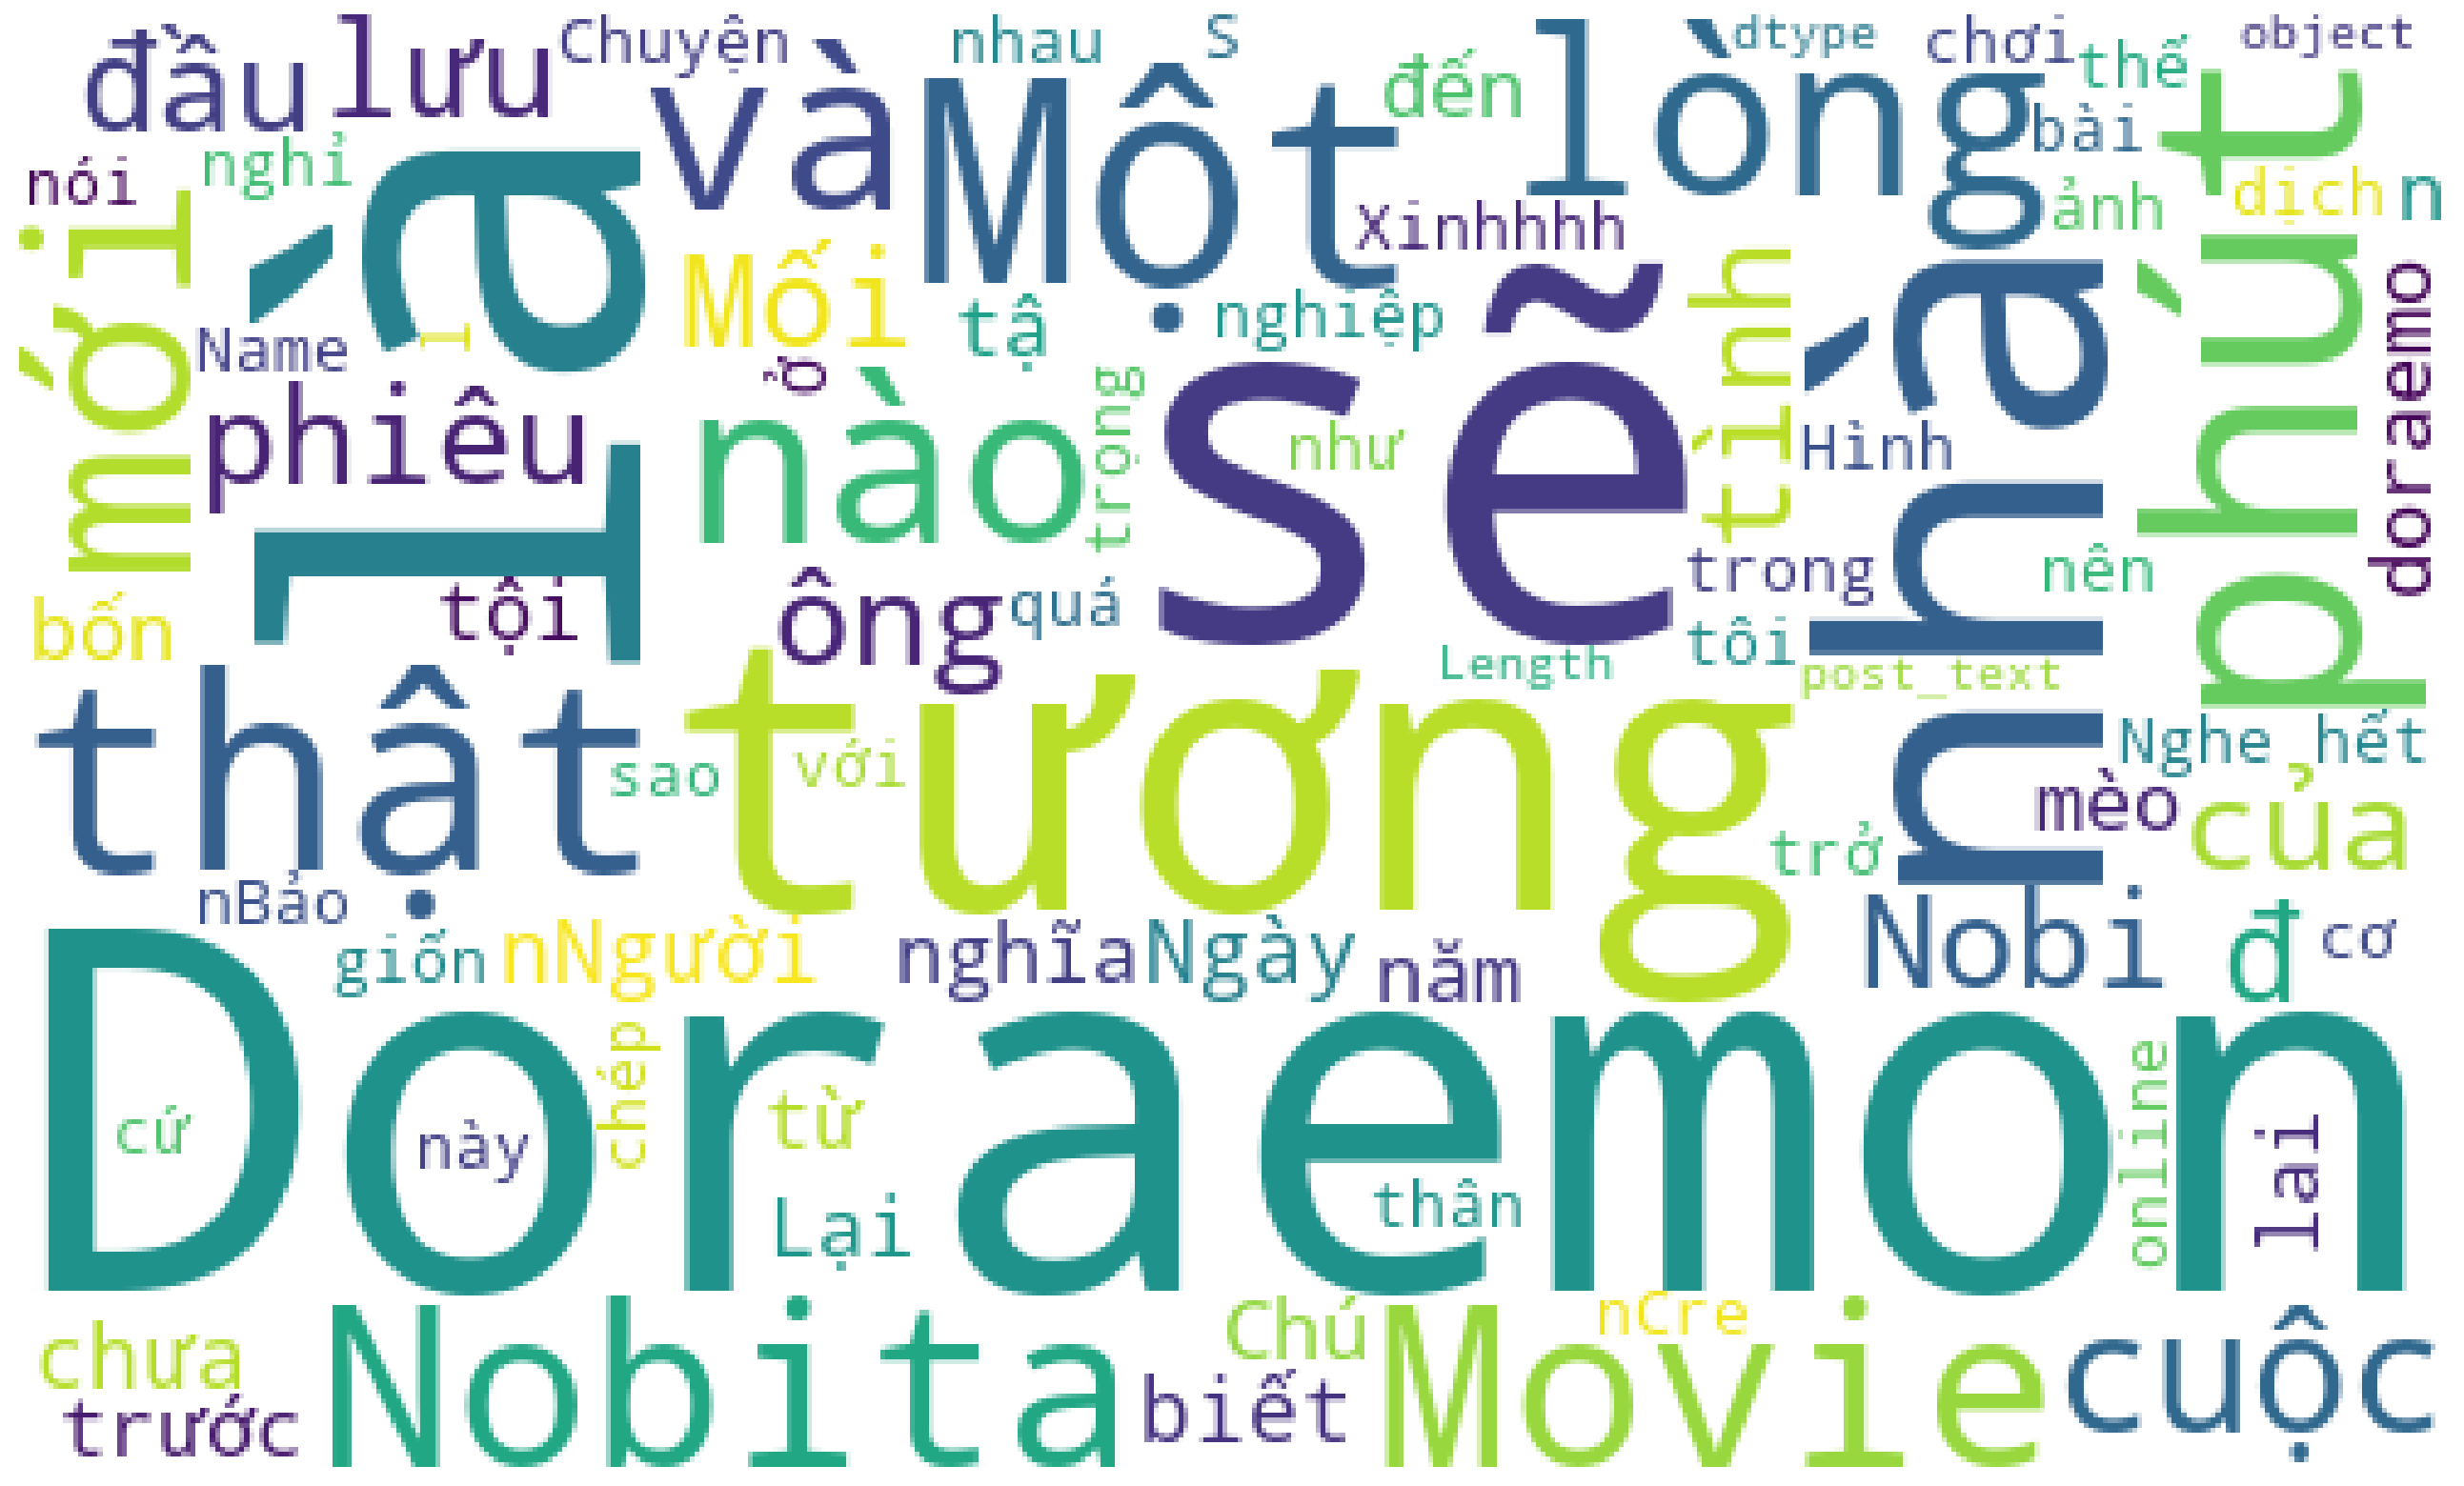

In [85]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Keyword

In [102]:
!pip install -U nltk
!pip install rake-nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import tokenize
import math
from operator import itemgetter

#### Read file and hendle

In [106]:
post_df_full_with_reactions['post_text'] = post_df_full_with_reactions['post_text'].fillna("")  
text = ""
for i in post_df_full_with_reactions['post_text']:
    if isinstance(i, str):
        text = text + i + "\n"

In [107]:
text

'Một phút thật lòng nào :)\nMovie Doraemon mới: Nobita và cuộc phiêu lưu đến hành tinh Bắc Đẩu 😌\nMối tình đầu của ông Nobi.\nNgười chưa biết sẽ nghĩ đây là một chuyện tình cảm động 😌\nNgày 11/12/1992, nghĩa là 31 năm trước, bốn tập truyện tranh đầu tiên của bộ sách “Đô rê mon chú mèo máy thông minh" đã được phát hành tại TP Hồ Chí Minh. Ngày này đã được ghi nhận mở đầu cho sự kiện xuất bảnXem thêm Đô rê mon ở Việt Nam. Có thể nói, "Chú mèo máy thông minh Đô rê mon" chính là sự mở đầu cho nhận thức của thế hệ thanh thiếu niên Việt Nam lúc bấy giờ hiểu rõ hơn về thuật ngữ truyện tranh–manga hay cũng có thể gọi là bước chạm đầu tiên của văn hóa Nhật Bản đến với người Việt Nam sau cuộc chiến tranh dai dẳng và vất vả để hồi phục đất nước sau đó. Sự xuất hiện của Đô re môn năm 1993 như một kỷ niệm không bao giờ phai nhạt của thiếu nhi thời đó, mà có lẽ, họ đã là cha mẹ của những em thiếu nhi khác, ngay tại thời điểm này.\n\nNguồn: Saigon8\n#Doraemon #Doraemonvietnam #Doraemonvn\n#truyentran

In [101]:
fi = open("stop_word.inp",encoding="utf-8")
s = fi.read()
s = s.replace("'","")
s = s.split()

['đã', 'không,', 'gần', 'hết,', 'tỏ', 'ra,', 'nói', 'nhỏ,', 'thúng', 'thắng,', 'từ', 'loại,', 'bao', 'nhiêu,', 'ăn', 'làm,', 'phỉ', 'phui,', 'chứ', 'như,', 'vung', 'thiên', 'địa,', 'sang', 'sáng,', 'tại', 'đâu,', 'ông', 'từ,', 'giữa', 'lúc,', 'giờ', 'đây,', 'câu', 'hỏi,', 'không', 'điều', 'kiện,', 'khẳng', 'định,', 'chốc', 'chốc,', 'lấy', 'ra,', 'nước', 'xuống,', 'nói', 'là,', 'sau', 'đó,', 'là', 'phải,', 'về', 'không,', 'dành', 'dành,', 'làm', 'tăng,', 'có', 'tháng,', 'tất', 'cả', 'bao', 'nhiêu,', 'nhìn', 'theo,', 'ơ', 'kìa,', 'cho', 'được,', 'ầu', 'ơ,', 'trong', 'này,', 'ối', 'giời,', 'tránh', 'khỏi,', 'ứ', 'hự,', 'chẳng', 'nữa,', 'cần', 'số,', 'phải', 'rồi,', 'đã', 'thế,', 'khó', 'chơi,', 'ờ', 'ờ,', 'sẽ', 'hay,', 'đưa', 'chuyện,', 'lượng', 'số,', 'cơ', 'cùng,', 'cho', 'rằng,', 'lúc', 'này,', 'quan', 'trọng,', 'ăn', 'chung,', 'vài', 'điều,', 'đang', 'tay,', 'lòng', 'không,', 'tới', 'nơi,', 'chết', 'thật,', 'cha', 'chả,', 'tăng', 'cấp,', 'ý', 'chừng,', 'đưa', 'em,', 'căn', 'tính,', 'c

In [108]:
for i in s:
  text = text.replace(i,"")

In [109]:
# tìm số từ xuất hiện trong tài liệu
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

#tìm số câu xuất hiện trong tài liệu
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len) 

1459
49


In [112]:
fi = open("stop_word2.inp",encoding="utf-8")
ss = fi.read()
ss = ss.replace("'","")
ss = ss.split()
print(ss)

['nhưng,', 'trả,', 'nhóm,', 'vậy,', 'liên_kết,', 'thẩy,', 'cấp,', 'vừa,', 'ơ,', 'trước,', 'mọi,', 'nhận,', 'lời,', 'và,', 'amen,', 'chậc,', 'cách,', 'trên,', 'bài,', 'ngôi,', 'trệt,', 'nói,', 'hai,', 'buổi,', 'thấp,', 'loài,', 'tạo,', 'thốc,', 'vụt,', 'không,', 'thường,', 'chính,', 'cùng,', 'điểm,', 'bệt,', 'nếu,', 'ái,', 'oái,', 'bản,', 'giảm,', 'bển,', 'giữa,', 'bông,', 'sắp,', 'giờ,', 'ngay,', 'cái,', 'khó,', 'thế,', 'bỗng,', 'tránh,', 'rõ,', 'thuần,', 'phía,', 'bên,', 'hoa,', 'chú,', 'tới,', 'bước,', 'bà,', 'chỉ,', 'ờ,', 'chung,', 'nghĩ,', 'tỉnh,', 'tin,', 'rằng,', 'ngày,', 'căn,', 'gần,', 'ngoải,', 'sáng,', 'nóc,', 'mối,', 'được,', 'càng,', 'rồi,', 'chị,', 'cuộc,', 'nặng,', 'con,', 'sang,', 'bức,', 'nguồn,', 'giữ,', 'loại,', 'điều,', 'nhất,', 'phót,', 'bớ,', 'thoắt,', 'ngoài,', 'cần,', 'từng,', 'lúc,', 'bằng,', 'vẫn,', 'cơ,', 'này,', 'ồ,', 'thực_vật,', 'tấn,', 'ơi,', 'đúng,', 'dạ,', 'dễ,', 'bị,', 'vài,', 'bác,', 'ủa,', 'thỏm,', 'cũng,', 'nền,', 'nhằm,', 'ngồi,', 'xuống,', 'ấy,', '

In [114]:
# Tính TF cho mỗi từ
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in ss:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
print(tf_score)

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'Một': 1, 'phút': 2, 'n': 18, ':)': 2, 'Movie': 1, 'Doon': 14, ':': 2, 'Nobit': 10, 'v': 24, 'ộc': 5, 'phiêu': 3, 'lưu': 3, 'hnh': 2, 'h': 9, 'Bắc': 2, 'Đẩu': 1, '😌': 6, 'M': 3, 'đ': 12, 'Nobi': 3, 'Ngưi': 3, 'yện': 1, 'm': 26, 'động': 2, 'Ngy': 3, '11/12/1992,': 1, '31': 1, ',': 9, 'bốn': 1, 'truyện': 5, 'tnh': 3, 'tiên': 2, 'sch': 1, '“Đ': 1, 'rê': 3, 'mon': 2, 'mèo': 8, 'my': 5, 'th': 11, 'minh"': 1, 'pht': 1, 'TP': 1, 'H': 2, 'Chí': 1, 'Minh': 1, 'ghi': 1, 'kiện': 1, 'X': 4, 'Đ': 3, 'Việt': 3, 'Nm': 3, 'Có': 2, '"Chú': 1, 'minh': 5, 'mon"': 1, 'thc': 2, 'hệ': 1, 'nh': 16, 'niên': 2, 'hiểu': 1, 'hn': 2, 'thuật': 2, 'ngữ': 1, 'tnh–': 1, 'gọi': 2, 'chm': 1, 'hó': 1, 'Nhật': 3, 'Bản': 3, 'ngưi': 18, 'chiến': 1, 'd': 5, 'dẳng': 1, 'vất': 1, 'i': 2, 'phục': 1, '': 16, 'Sự': 3, 're': 1, 'mn': 4, '1993': 1, 'kỷ': 2, 'niệm': 3, 'kh': 9, 'ph': 2, 'nht': 1, 'nhi': 2, 'mẹ': 6, 'Ngun:': 4, 'Sgon8': 1, '#Doon': 6, '#Doonvietnm': 1, '#Doonvn': 3, '#truyentnh': 1, '#': 1, 'Chú': 1, 'tưng': 3, 'l'

In [115]:
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


#  Tính IDF cho mỗi từ
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)

# tính kết quả là tích TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()} 
print(tf_idf_score)

{'Một': 3.8918202981106265, 'phút': 1.4069136483226263, 'n': 0.02061928720273561, ':)': 1.493925025312256, 'Movie': 3.8918202981106265, 'Doon': 0.8960880245566357, ':': 1.1837700970084166, 'Nobit': 1.1192315758708453, 'v': 0.6337237600891445, 'ộc': 1.4069136483226263, 'phiêu': 1.1837700970084166, 'lưu': 1.1837700970084166, 'hnh': 0.08515780834030677, 'h': 0.06317890162153167, 'Bắc': 1.8123787564307907, 'Đẩu': 3.8918202981106265, '😌': 2.505525936990736, 'M': 1.001448540214462, 'đ': 0.6337237600891445, 'Nobi': 1.1192315758708453, 'Ngưi': 1.1837700970084166, 'yện': 3.8918202981106265, 'm': 0.25423413838424086, 'động': 1.493925025312256, 'Ngy': 1.1192315758708453, '11/12/1992,': 3.8918202981106265, '31': 3.8918202981106265, ',': 0.6337237600891445, 'bốn': 3.8918202981106265, 'truyện': 1.6945957207744073, 'tnh': 0.15415067982725836, 'tiên': 0.8960880245566357, 'sch': 3.8918202981106265, '“Đ': 3.8918202981106265, 'rê': 1.252762968495368, 'mon': 0.4260843953109001, 'mèo': 1.8123787564307907, 

In [116]:
# Lấy N từ quan trong nhất
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 10)

{':))': 0.027646316438266563,
 '#on': 0.012003558150444016,
 'Ảnh:': 0.010669829467061348,
 'v': 0.010424516958286133,
 '😌': 0.010303739288515707,
 '<3': 0.010303739288515707,
 'mèo': 0.009937649109970066,
 'Cre:': 0.00921543881275552,
 'Doon': 0.008598514286355654,
 'ngưi': 0.008302262178453505}